# Implementation from Scratch

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.

## [Task 1] Create a Class of Linear Regression from Scratch

<br />

I will create a class of linear regression and incorporate it to the pipeline of regressions on the "sprint2" directory.

#### Hypothesis Function

<br />

I implement the following hypothesis function of linear regression.

$$
h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_j x_j + \theta_n x_n \ \ \ (x_0=1)
$$

$x$: feature vector

$\theta$: parameter vector

$n$: the number of features

$x_j$: jth feature vector

$\theta_j$: jth parameter(weight) vector

I will implement the hypothesis function that can apply to any $n$, the number of features.

<br />

In addition, the following equation is the vector format.

$$
h_\theta(x) = \theta^T x
$$

#### Objective Function

<br />


I will implement the following objective function of linear regression. This is the MSE, mean square error divided by 2 to use the steepest descent method easily.

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
$$

$m$: the number of data input

$h_\theta()$: hypothesis function

$x^{(i)}$: feature vector of ith sample

$y^{(i)}$: correct values of ith sample

#### Steepest Descent Method

<br />

I will fit datasets by steepest descent method. The following equation is to update the jth parameter.

$$
\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]
$$

$\alpha$: learning rate

$i$: index of a sample

$j$: index of a feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Create a class of linear regression from scratch

class ScratchLinearRegression():
    """
    Implementation of linear regression from scratch
    
    Parameters
    ----------
    num_iter: int
        The number of iteration
    
    lr: float
        Learning rate
    
    no_bias: bool
        True if not input the bias term
    
    verbose: bool
        True if output the learning process
    
    
    Attributes
    ----------
    self.coef_: ndarray whose shape is (n_features,)
        parameters
    
    self.loss: ndarray whose shape is (self.iter,)
        records of loss on train dataset
    
    self.val_loss: ndarray whose shape is (self.iter,)
        records of loss on validation dataset
    """
    
    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attribute
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        
        # Prepare arrays for recording loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Fit linear regression. In a case of inputting validation dataset, return loss and accuracy of 
        the data per iteration.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        y: ndarray whose shape is (n_samples,)
            Correct values of train dataset
        
        X_val: ndarray whose shape is (n_samples,n_features)
            Features of validation dataset
        
        y_val: ndarray whose shape is (n_samples,)
            Correct values of validation dataset
        """
        
        ###print("fit-1, X=",X.shape)   # (1168,2)
        ###print("fit-2, y=",y.shape)   # (1168,)
        ###print("fit-101, X_val=",X_val.shape)   # (292,2)
        ###print("fit-102, y_val=",y_val.shape)   # (292,)
        
        # Change the vectors to a matrix
        y = y.reshape(len(y), 1)
        if y_val is not None:
            y_val = y_val.reshape(len(y_val), 1)
        
        # Add a bias if self.bias is True
        if self.bias == True:
            # Create arrays of biases
            X_bias = np.array([1 for _ in range(X.shape[1])])
            y_bias = np.array([1 for _ in range(y.shape[1])])
            ###print("fit-3, X_bias=",X_bias.shape)   # (1168,)
            ###print("fit-4, y_bias=",y_bias.shape)   # (1168,)
            # Add the biases
            X = np.vstack((X_bias, X))
            y = np.vstack((y_bias, y))
        
        # Transform dataframes to move their features to rows
        X = X.T
        y = y.T
        if (X_val is not None) and (y_val is not None):
            X_val = X_val.T
            y_val = y_val.T
        
        ###print("fit-5, X=",X.shape)   # (2,1168)
        ###print("fit-6, y=",y.shape)   # (1,1168)
        ###if (X_val is not None) and (y_val is not None):
            ###print("fit-103, X_val=",X_val.shape)   # (2,292)
            ###print("fit-104, y_val=",y_val.shape)   # (1,292)
        
        # Set a hypothesis parameter randomly and transform it
        self.coef_ = np.random.randn(X.shape[0])
        self.coef_ = self.coef_.reshape(len(self.coef_),1)
        ###print("fit-7, self.coef_=",self.coef_.shape)   # (2,1)
        
        # Update the theta and get loss of train dataset
        for i in range(self.iter):
            # Update the parameter
            self.coef_ = self._gradient_descent(X, y)
            ###print("fit-8, self.coef_=",self.coef_.shape)   # (2,1)
            # Compute the mean square mean
            mse = self._compute_cost(X, y)
            ###print("fit-9, mse=",mse.shape)   # ()
            # Record the errors
            self.loss[i] = mse
            # Return the loss if verbose is True
            if self.verbose:
                print(self.loss[i])
            
            # Get loss of validation datasets
            if (X_val is not None) and (y_val is not None):
                # Get the mean square error
                val_mse = self._compute_cost(X_val, y_val)
                # Record the errors
                self.val_loss[i] = val_mse
                # Return the loss if verbose is True
                if self.verbose:
                    print(self.val_loss[i])
    
    
    def predict(self, X):
        """
        Predict by using linear regression
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Samples
        
        
        Returns
        ----------
        ndarray whose shape is (n_samples,1)
            Results of the prediction by using linear regression
        """
        
        if self.bias == True:
            X_bias = np.array([1 for _ in range(X.shape[1])])
            X = np.vstack((X_bias, X))
        
        ###print("predict-1, self.coef_=",self.coef_.shape)
        ###print("predict-2, X=",X.shape)
        
        # Predict train dataset
        y_pred = np.dot(self.coef_.T, X.T)   # (1,2) * (2,293)
        
        return y_pred
    
    
    # Create a definition of hypothesis function of lunear regression
    def _linear_hypothesis(self, X):
        """
        Return hypothesis function of linear regression
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Train dataset
        
        Returns
        ----------
        ndarray whose shape is (n_samples,1)
            Results of the prediction by hypothesis function of linear regression
        """
        
        # Compute the hypothesis function
        y_pred = np.dot(self.coef_.T, X)   # (1,2) * (2,1168)
        ###print("_linear_hypothesis-1, y_pred=",y_pred.shape)   # (1,1168)
         
        return y_pred
    
    
    # Create a definition to compute the mean square error
    def _compute_cost(self, X, y):
        """
        Compute the mean square error. Import the "MSE" definition.

        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            train dataset

        y: ndarray whose shape is (n_samples,1)
            correct value


        Returns
        ----------
        ndarray whose shape is (1,)
            mean square error
        """

        y_pred = self._linear_hypothesis(X)
    
        return self.MSE(y_pred, y)
    
    
    # Create a definition of the mean square error
    def MSE(self, y_pred, y):
        """
        Return the mean square error
        
        Parameters
        ----------
        y_pred: ndarray whose shape is (n_samples,)
            predited value
        
        y: ndarray whose shape is (n_samples,)
            correct value
        
        
        Returns
        ----------
        mse: numpy.float
            mean square error
        """
        
        # Compute an error
        error = y_pred - y
        ###print("MSE-1, error=",error.shape)   # (1,1168)
        
        # Sum errors
        sum_errors = np.sum(error**2)
        
        # Return the mean square error devided by 2
        return sum_errors / (2*y.shape[1])
    
    
    # Create a definition to fit datasets by steepest descent method
    def _gradient_descent(self, X, y):
        """
        Fit datasets by steepest descent method
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            train dataset
        
        y: ndarray whose shape is (n_samples,1)
            correct value
        
        
        Returns
        ----------
        ndarray whose shape is (1,)
            parameter(weight)
        """
        
        # Predict train dataset
        y_pred = np.dot(self.coef_.T, X)   # (1,2) * (2,1168)
        ###print("_gradient_decsent-1, y_pred=",y_pred.shape)  # (1,1168)
        
        ###print("_gradient_decsent-1, y=",y.shape)   # (1,1168)
        
        # Compute the error and the mean square error
        error = y_pred - y   # (1,1168)
        ###print("_gradient_decsent-2, error=",error.shape)   # (1,1168)
        
        # Compute the gradient
        grad = np.dot(X, error.T)   # (2,1168) * (1168,1)
        ###print("_gradient_decsent-3, grad=",grad.shape)   # (2,1)
        
        # Update the parameter
        return self.coef_ - self.lr*grad/y.shape[1]
    
    
    # Plot learning records
    def plot_learning_record(self):
        plt.plot(self.loss, label="loss")
        plt.plot(self.val_loss, label="val_loss")
        
        plt.title("Learning Records")
        plt.xlabel("Number of Iterrations")
        plt.ylabel("Loss")
        plt.grid(True)
        
        plt.legend()
        plt.show()

### Validate the Class

<br />

I am going to validate the class by using the "House Prices: Advanced Regression Techniques" datasets on Kaggle.

In [3]:
# Prepare a dataset for the validation

# Import the dataset
train = pd.read_csv('"House Prices- Advanced Regression Techniques".train.csv')
test = pd.read_csv('"House Prices- Advanced Regression Techniques".test.csv')

# Split the datasets into explanatory and objective variables
X = train.loc[:,["GrLivArea", "YearBuilt"]].values
y = train.SalePrice.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Xy = pd.concat([X,y], axis=1)

#df = Xy[Xy.Species!=0]

# create and save a csv file of the dataframe
#df.to_csv('iris_dataset.csv')

In [4]:
# Standardize the dataset

# Initialize the class
scaler = StandardScaler()

# Fit the dataset
scaler.fit(X_train)

# Transfer the datasets
std_X_train = scaler.transform(X_train)

# Fit the dataset
scaler.fit(X_test)

# Transfer the datasets
std_X_test = scaler.transform(X_test)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

In [5]:
# Initialize the class

slr = ScratchLinearRegression(num_iter=10000, lr=0.0001, bias=True, verbose=True)

In [6]:
slr.fit(std_X_train, y_train, std_X_test, y_test)

19425605371.787487
19826317512.81285
19425158530.519585
19825765885.394886
19424711793.31984
19825214380.83278
19424265160.16396
19824662999.0985
19423818631.02768
19824111740.164017
19423372205.88672
19823560604.001297
19422925884.716824
19823009590.58234
19422479667.493732
19822458699.87912
19422033554.193188
19821907931.863644
19421587544.790947
19821357286.5079
19421141639.262764
19820806763.78391
19420695837.584408
19820256363.66368
19420250139.731647
19819706086.119236
19419804545.680252
19819155931.1226
19419359055.40601
19818605898.64581
19418913668.884705
19818055988.66091
19418468386.09212
19817506201.139942
19418023207.00407
19816956536.054962
19417578131.596348
19816406993.37803
19417133159.844772
19815857573.081207
19416688291.725147
19815308275.13658
19416243527.213295
19814759099.516212
19415798866.285046
19814210046.192204
19415354308.91623
19813661115.13663
19414909855.08268
19813112306.32161
19414465504.760246
19812563619.71923
19414021257.924774
19812015055.301617
19

19216270487.94021
19567241127.740414
19215872395.13445
19566747122.326717
19215474395.023605
19566253226.6284
19215076487.586044
19565759440.62045
19214678672.800156
19565265764.277878
19214280950.64432
19564772197.5757
19213883321.09693
19564278740.488922
19213485784.136383
19563785392.992577
19213088339.741077
19563292155.061684
19212690987.88942
19562799026.671276
19212293728.55982
19562306007.796402
19211896561.730694
19561813098.412098
19211499487.38046
19561320298.49342
19211102505.48755
19560827608.01542
19210705616.03039
19560335026.953167
19210308818.987423
19559842555.28172
19209912114.337082
19559350192.976162
19209515502.057816
19558857940.011566
19209118982.128082
19558365796.363018
19208722554.526325
19557873762.00561
19208326219.231018
19557381836.91444
19207929976.220615
19556890021.064613
19207533825.473595
19556398314.431232
19207137766.968437
19555906716.989418
19206741800.683617
19555415228.714287
19206345926.597622
19554923849.58096
19205950144.68895
19554432579.56

19060221767.314014
19373168428.726006
19059860006.816322
19372717474.64256
19059498330.538254
19372266620.470444
19059136738.46017
19371815866.186916
19058775230.562424
19371365211.769257
19058413806.825386
19370914657.194733
19058052467.229416
19370464202.440624
19057691211.754894
19370013847.484207
19057330040.382202
19369563592.30278
19056968953.091717
19369113436.873627
19056607949.863827
19368663381.174057
19056247030.678925
19368213425.181366
19055886195.517406
19367763568.872868
19055525444.359673
19367313812.225872
19055164777.18613
19366864155.217705
19054804193.97719
19366414597.825695
19054443694.713264
19365965140.02716
19054083279.37477
19365515781.799442
19053722947.942146
19365066523.119892
19053362700.395805
19364617363.96584
19053002536.716183
19364168304.314648
19052642456.88372
19363719344.14366
19052282460.878864
19363270483.430256
19051922548.682053
19362821722.151787
19051562720.27374
19362373060.285637
19051202975.634384
19361924497.809177
19050843314.744442
1936

18923354191.943428
19202176325.758823
18923024292.072857
19201763210.940758
18922694468.99071
19201350187.428062
18922364722.67907
19200937255.199993
18922035053.120037
19200524414.235794
18921705460.295708
19200111664.51473
18921375944.18819
19199699006.016056
18921046504.779587
19199286438.719044
18920717142.05201
19198873962.60296
18920387855.98758
19198461577.64709
18920058646.568413
19198049283.830708
18919729513.77663
19197637081.1331
18919400457.59437
19197224969.53357
18919071478.003757
19196812949.011387
18918742574.98693
19196401019.54587
18918413748.52603
19195989181.116333
18918084998.603207
19195577433.70206
18917756325.200607
19195165777.282387
18917427728.30038
19194754211.836624
18917099207.884686
19194342737.344097
18916770763.935696
19193931353.784134
18916442396.43556
19193520061.136074
18916114105.366455
19193108859.379246
18915785890.710564
19192697748.493004
18915457752.45005
19192286728.45669
18915129690.567112
19191875799.249657
18914801705.043926
19191464960.85

19034571795.403435
18789544536.438316
19034195674.936752
18789245779.43754
19033819637.373196
18788947091.962368
19033443682.693947
18788648473.996597
19033067810.8802
18788349925.524017
19032692021.913147
18788051446.528423
19032316315.77398
18787753036.993607
19031940692.44391
18787454696.90338
19031565151.904133
18787156426.241543
19031189694.13587
18786858224.991905
19030814319.120335
18786560093.138287
19030439026.838745
18786262030.664497
19030063817.27232
18785964037.55436
19029688690.402298
18785666113.791702
19029313646.2099
18785368259.36035
19028938684.67637
18785070474.24414
19028563805.782948
18784772758.4269
19028189009.510883
18784475111.89248
19027814295.841415
18784177534.62472
19027439664.755806
18783880026.60747
19027065116.235317
18783582587.824577
19026690650.261204
18783285218.259895
19026316266.814735
18782987917.89729
19025941965.877186
18782690686.720615
19025567747.42983
18782393524.713745
19025193611.45394
18782096431.86055
19024819557.930813
18781799408.1448

18671888461.656128
18885729622.23943
18671617082.470795
18885386264.85996
18671345766.427223
18885042982.953304
18671074513.510685
18884699776.502357
18670803323.706474
18884356645.490025
18670532196.99986
18884013589.899204
18670261133.376144
18883670609.712807
18669990132.820614
18883327704.913742
18669719195.318565
18882984875.484932
18669448320.855293
18882642121.409294
18669177509.4161
18882299442.66975
18668906760.986294
18881956839.24923
18668636075.551186
18881614311.130665
18668365453.09608
18881271858.296997
18668094893.606304
18880929480.73116
18667824397.06717
18880587178.416096
18667553963.463997
18880244951.334755
18667283592.782116
18879902799.470093
18667013285.00685
18879560722.805054
18666743040.123543
18879218721.322605
18666472858.117523
18878876795.00572
18666202738.974136
18878534943.83735
18665932682.678715
18878193167.80047
18665662689.216618
18877851466.878056
18665392758.573185
18877509841.053093
18665122890.733772
18877168290.30856
18664853085.683743
18876826

18567234484.8674
18752974838.076797
18566987453.126305
18752660621.374626
18566740478.850533
18752346473.546368
18566493562.026703
18752032394.57642
18566246702.64141
18751718384.44922
18565999900.68127
18751404443.14918
18565753156.1329
18751090570.660736
18565506468.982906
18750776766.968307
18565259839.217915
18750463032.05633
18565013266.824543
18750149365.90925
18564766751.789425
18749835768.511497
18564520294.099174
18749522239.847515
18564273893.74043
18749208779.90176
18564027550.699837
18748895388.65868
18563781264.964012
18748582066.102726
18563535036.519615
18748268812.21836
18563288865.35328
18747955626.990047
18563042751.451656
18747642510.402252
18562796694.801388
18747329462.439438
18562550695.38914
18747016483.086086
18562304753.201565
18746703572.326664
18562058868.22532
18746390730.145657
18561813040.447063
18746077956.527546
18561567269.85347
18745765251.45683
18561321556.431206
18745452614.917976
18561075900.16694
18745140046.895496
18560830301.047348
18744827547.37

18623728114.3586
18465692192.097244
18623442184.538654
18465468778.918713
18623156317.197254
18465245417.699844
18622870512.320282
18465022108.42853
18622584769.893635
18464798851.09266
18622299089.903194
18464575645.680134
18622013472.334866
18464352492.17884
18621727917.174545
18464129390.576683
18621442424.408134
18463906340.86157
18621156994.02154
18463683343.0214
18620871626.000675
18463460397.044083
18620586320.331448
18463237502.91753
18620301076.99977
18463014660.629658
18620015895.99157
18462791870.168385
18619730777.292767
18462569131.521626
18619445720.88928
18462346444.677307
18619160726.76704
18462123809.623356
18618875794.911987
18461901226.347694
18618590925.310043
18461678694.838257
18618306117.94716
18461456215.082977
18618021372.80927
18461233787.06979
18617736689.882317
18461011410.786644
18617452069.152256
18460789086.22147
18617167510.605038
18460566813.36222
18616883014.22661
18460344592.196835
18616598580.002937
18460122422.713276
18616314207.919968
18459900304.8

18373655236.228043
18505318794.858856
18373453225.902843
18505058697.429768
18373251262.548935
18504798656.64888
18373049346.155376
18504538672.503414
18372847476.71122
18504278744.980606
18372645654.20553
18504018874.067684
18372443878.627354
18503759059.751884
18372242149.96577
18503499302.020443
18372040468.209835
18503239600.860607
18371838833.348618
18502979956.259613
18371637245.371197
18502720368.204712
18371435704.266636
18502460836.68315
18371234210.024025
18502201361.682182
18371032762.63243
18501941943.189068
18370831362.08094
18501682581.19106
18370630008.35863
18501423275.675415
18370428701.454594
18501164026.62941
18370227441.35792
18500904834.040302
18370026228.0577
18500645697.895367
18369825061.54303
18500386618.18187
18369623941.802998
18500127594.8871
18369422868.82671
18499868627.998325
18369221842.603268
18499609717.50283
18369020863.121773
18499350863.3879
18368819930.371338
18499092065.640827
18368619044.34107
18498833324.248894
18368418205.02007
18498574639.1993

18292080296.782497
18399960155.26021
18291897252.085358
18399722967.287315
18291714249.939903
18399485830.80125
18291531290.336224
18399248745.79043
18291348373.26441
18399011712.24325
18291165498.714546
18398774730.148148
18290982666.67672
18398537799.49353
18290799877.14104
18398300920.267826
18290617130.097588
18398064092.459454
18290434425.536465
18397827316.056843
18290251763.447777
18397590591.04842
18290069143.821632
18397353917.422623
18289886566.648125
18397117295.16788
18289704031.91737
18396880724.272636
18289521539.619476
18396644204.725334
18289339089.744553
18396407736.51441
18289156682.28272
18396171319.628304
18288974317.2241
18395934954.055473
18288791994.558792
18395698639.784367
18288609714.27694
18395462376.803444
18288427476.368656
18395226165.101147
18288245280.824074
18394990004.665947
18288063127.633312
18394753895.4863
18287881016.78652
18394517837.550667
18287698948.273804
18394281830.84753
18287516922.085323
18394045875.36534
18287334938.211205
18393809971.09

18300410648.530403
18215348708.61378
18300195032.070328
18215183499.28167
18299979462.246307
18215018328.345734
18299763939.047863
18214853195.797035
18299548462.464523
18214688101.626625
18299333032.48582
18214523045.825554
18299117649.101276
18214358028.3849
18298902312.30043
18214193049.295708
18298687022.072823
18214028108.54906
18298471778.407978
18213863206.136013
18298256581.295452
18213698342.04764
18298041430.724773
18213533516.275013
18297826326.685493
18213368728.8092
18297611269.167168
18213203979.641285
18297396258.159332
18213039268.762344
18297181293.651546
18212874596.16345
18296966375.63337
18212709961.835682
18296751504.09435
18212545365.77014
18296536679.024048
18212380807.957905
18296321900.41203
18212216288.390057
18296107168.24786
18212051807.05769
18295892482.521103
18211887363.951897
18295677843.22133
18211722959.06377
18295463250.338108
18211558592.38441
18295248703.861015
18211394263.904915
18295034203.779625
18211229973.61638
18294819750.08352
18211065721.509

18146092772.6406
18209507308.882736
18145943657.051067
18209311317.986862
18145794576.108654
18209115369.322758
18145645529.80529
18208919462.880947
18145496518.1329
18208723598.651966
18145347541.08342
18208527776.62635
18145198598.648785
18208331996.794643
18145049690.820934
18208136259.14739
18144900817.591805
18207940563.675117
18144751978.953346
18207744910.368393
18144603174.897488
18207549299.217743
18144454405.41618
18207353730.213734
18144305670.501377
18207158203.346912
18144156970.14501
18206962718.60783
18144008304.339046
18206767275.987045
18143859673.07543
18206571875.475117
18143711076.346115
18206376517.062607
18143562514.14306
18206181200.740074
18143413986.45822
18205985926.49809
18143265493.28356
18205790694.32721
18143117034.61104
18205595504.218014
18142968610.432613
18205400356.16107
18142820220.740257
18205205250.146957
18142671865.525936
18205010186.166245
18142523544.781616
18204815164.20951
18142375258.49927
18204620184.26734
18142227006.67087
18204425246.3303

18086010583.793194
18130256686.905857
18085875426.650723
18130077741.55412
18085740300.904305
18129898834.616768
18085605206.546646
18129719966.085213
18085470143.57042
18129541135.95086
18085335111.968323
18129362344.205112
18085200111.73305
18129183590.83939
18085065142.857296
18129004875.845097
18084930205.333755
18128826199.213665
18084795299.15513
18128647560.936504
18084660424.314114
18128468961.005028
18084525580.803417
18128290399.410667
18084390768.615738
18128111876.144844
18084255987.743786
18127933391.198982
18084121238.180264
18127754944.564507
18083986519.917877
18127576536.232857
18083851832.94934
18127398166.195454
18083717177.267372
18127219834.443733
18083582552.864674
18127041540.96914
18083447959.733974
18126863285.763103
18083313397.867977
18126685068.817062
18083178867.25941
18126506890.12246
18083044367.90099
18126328749.67074
18082909899.78544
18126150647.453346
18082775462.905487
18125972583.461735
18082641057.253853
18125794557.68734
18082506682.823265
1812561

18031306935.900578
18057559455.61267
18031184484.441208
18057396086.443626
18031062061.41916
18057232752.20805
18030939666.827812
18057069452.898132
18030817300.66054
18056906188.506092
18030694962.91073
18056742959.024128
18030572653.571762
18056579764.444447
18030450372.637024
18056416604.75926
18030328120.099895
18056253479.960773
18030205895.953773
18056090390.041206
18030083700.19204
18055927334.992764
18029961532.80809
18055764314.80767
18029839393.795315
18055601329.47815
18029717283.147106
18055438378.996403
18029595200.856865
18055275463.354668
18029473146.917984
18055112582.54515
18029351121.32386
18054949736.5601
18029229124.0679
18054786925.391724
18029107155.143497
18054624149.032257
18028985214.54406
18054461407.473934
18028863302.262997
18054298700.708977
18028741418.2937
18054136028.729626
18028619562.629593
18053973391.528114
18028497735.264076
18053810789.096687
18028375936.19056
18053648221.427574
18028254165.402466
18053485688.513023
18028132422.893196
18053323190.3

17991327572.476322
17981745178.25661
17991178337.72751
17981634235.2107
17991029134.76044
17981523317.922676
17990879963.56804
17981412426.386543
17990730824.14322
17981301560.596302
17990581716.47892
17981190720.54596
17990432640.568058
17981079906.22953
17990283596.40356
17980969117.641014
17990134583.978367
17980858354.774426
17989985603.28539
17980747617.62378
17989836654.317577
17980636906.18309
17989687737.067863
17980526220.44636
17989538851.52918
17980415560.40762
17989389997.694458
17980304926.060875
17989241175.556656
17980194317.400154
17989092385.108692
17980083734.419476
17988943626.34352
17979973177.11286
17988794899.254086
17979862645.47433
17988646203.83333
17979752139.497906
17988497540.074203
17979641659.17762
17988348907.969654
17979531204.5075
17988200307.51263
17979420775.48156
17988051738.696087
17979310372.093853
17987903201.512978
17979199994.338398
17987754695.956257
17979089642.20923
17987606222.01888
17978979315.700375
17987457779.693806
17978869014.80588
179

17930405874.63296
17936639813.40774
17930269587.199776
17936539341.17825
17930133328.66801
17936438892.26926
17929997099.031235
17936338466.675335
17929860898.28303
17936238064.39106
17929724726.416992
17936137685.411003
17929588583.426685
17936037329.729736
17929452469.305702
17935936997.34184
17929316384.047626
17935836688.241894
17929180327.64605
17935736402.424473
17929044300.094555
17935636139.88417
17928908301.386734
17935535900.61556
17928772331.516182
17935435684.613213
17928636390.476482
17935335491.87173
17928500478.26124
17935235322.385693
17928364594.86404
17935135176.149693
17928228740.278492
17935035053.15831
17928092914.498188
17934934953.406143
17927957117.516724
17934834876.88778
17927821349.32771
17934734823.5978
17927685609.92474
17934634793.530815
17927549899.30143
17934534786.68141
17927414217.451378
17934434803.04419
17927278564.368195
17934334842.61374
17927142940.045486
17934234905.384663
17927007344.476864
17934134991.351566
17926871777.655945
17934035100.50903

17895336201.71854
17874012292.770298
17895245315.098106
17873887938.225685
17895154449.567284
17873763609.93433
17895063605.12117
17873639307.89041
17894972781.75486
17873515032.088116
17894881979.463432
17873390782.521618
17894791198.242
17873266559.185112
17894700438.085655
17873142362.072784
17894609698.989494
17873018191.178818
17894518980.948612
17872894046.497406
17894428283.95812
17872769928.022743
17894337608.01311
17872645835.74901
17894246953.10869
17872521769.67041
17894156319.23996
17872397729.78113
17894065706.402023
17872273716.075375
17893975114.589993
17872149728.547337
17893884543.798965
17872025767.19121
17893793994.024063
17871901832.0012
17893703465.260384
17871777922.971508
17893612957.50304
17871654040.09634
17893522470.747154
17871530183.36989
17893432004.987823
17871406352.786366
17893341560.220165
17871282548.339985
17893251136.439304
17871158770.02494
17893160733.640347
17871035017.835445
17893070351.818417
17870911291.765717
17892979990.968628
17870787591.809

17857972658.363213
17822659418.54527
17857890440.4616
17822545880.95759
17857808241.63253
17822432367.228817
17857726061.87156
17822318877.353683
17857643901.174248
17822205411.326904
17857561759.536163
17822091969.143223
17857479636.95287
17821978550.797363
17857397533.41994
17821865156.284054
17857315448.932934
17821751785.598026
17857233383.487427
17821638438.734013
17857151337.078983
17821525115.686756
17857069309.70318
17821411816.450977
17856987301.355576
17821298541.02143
17856905312.031757
17821185289.392845
17856823341.7273
17821072061.559956
17856741390.437767
17820958857.517506
17856659458.15874
17820845677.26024
17856577544.8858
17820732520.78289
17856495650.61452
17820619388.08022
17856413775.34048
17820506279.146957
17856331919.05926
17820393193.977856
17856250081.766445
17820280132.567665
17856168263.45761
17820167094.91112
17856086464.12835
17820054081.00299
17856004683.77423
17819941090.838013
17855922922.390858
17819828124.41094
17855841179.9738
17819715181.716534
178

17823503558.2417
17774831082.573368
17823429335.131332
17774727571.668236
17823355129.233635
17774624082.408596
17823280940.544605
17774520614.78968
17823206769.06024
17774417168.80672
17823132614.77653
17774313744.45495
17823058477.689487
17774210341.729588
17822984357.79511
17774106960.62588
17822910255.089386
17774003601.13906
17822836169.56833
17773900263.264362
17822762101.227936
17773796946.997017
17822688050.064213
17773693652.33226
17822614016.07317
17773590379.26534
17822539999.250797
17773487127.79149
17822465999.593117
17773383897.90595
17822392017.09613
17773280689.60396
17822318051.755848
17773177502.880764
17822244103.568275
17773074337.73161
17822170172.52942
17772971194.15174
17822096258.635303
17772868072.1364
17822022361.881924
17772764971.680832
17821948482.265305
17772661892.780293
17821874619.78146
17772558835.430027
17821800774.4264
17772455799.625282
17821726946.196144
17772352785.361313
17821653135.086704
17772249792.633373
17821579341.094097
17772146821.43671
1

17794133387.24188
17733678379.385662
17794065974.219917
17733583453.977726
17793998576.826702
17733488548.32528
17793931195.05861
17733393662.42397
17793863828.911995
17733298796.26945
17793796478.383232
17733203949.857388
17793729143.468685
17733109123.18344
17793661824.16473
17733014316.243267
17793594520.467735
17732919529.032536
17793527232.374058
17732824761.546906
17793459959.88008
17732730013.78204
17793392702.982178
17732635285.7336
17793325461.67672
17732540577.39726
17793258235.96008
17732445888.768684
17793191025.828625
17732351219.843536
17793123831.278744
17732256570.617493
17793056652.306805
17732161941.08622
17792989488.90919
17732067331.24538
17792922341.08227
17731972741.090656
17792855208.822433
17731878170.617718
17792788092.126053
17731783619.822243
17792720990.989506
17731689088.699898
17792653905.409187
17731594577.24636
17792586835.38147
17731500085.457317
17792519780.902733
17731405613.328434
17792452741.96937
17731311160.855396
17792385718.577763
17731216728.03

17765566067.964165
17693239868.349094
17765505276.812225
17693153337.011955
17765444499.749237
17693066823.587784
17765383736.771935
17692980328.07265
17765322987.877033
17692893850.462635
17765262253.061256
17692807390.753815
17765201532.32134
17692720948.94226
17765140825.654
17692634525.02406
17765080133.055977
17692548118.995277
17765019454.52399
17692461730.852005
17764958790.05478
17692375360.590313
17764898139.64506
17692289008.206287
17764837503.29158
17692202673.696022
17764776880.991062
17692116357.05558
17764716272.740234
17692030058.281055
17764655678.53584
17691943777.368538
17764595098.374607
17691857514.314106
17764534532.253273
17691771269.113842
17764473980.16857
17691685041.763847
17764413442.11724
17691598832.2602
17764352918.096016
17691512640.59899
17764292408.101643
17691426466.776314
17764231912.130848
17691340310.788254
17764171430.180374
17691254172.630913
17764110962.24697
17691168052.300373
17764050508.327374
17691081949.792732
17763990068.41832
17690995865.1

17740903542.177086
17657950042.06298
17740848465.91376
17657870797.363876
17740793402.41081
17657791568.98321
17740738351.665253
17657712356.917427
17740683313.674145
17657633161.16296
17740628288.434498
17657553981.71624
17740573275.94337
17657474818.57371
17740518276.197784
17657395671.73181
17740463289.194786
17657316541.18697
17740408314.9314
17657237426.935642
17740353353.40468
17657158328.974255
17740298404.611656
17657079247.299255
17740243468.549374
17657000181.907085
17740188545.214874
17656921132.794178
17740133634.60519
17656842099.95699
17740078736.717373
17656763083.391964
17740023851.548462
17656684083.095535
17739968979.0955
17656605099.064167
17739914119.355534
17656526131.294285
17739859272.325603
17656447179.78235
17739804438.00276
17656368244.524807
17739749616.38405
17656289325.518105
17739694807.46651
17656210422.758694
17739640011.2472
17656131536.243027
17739585227.723164
17656052665.967552
17739530456.89145
17655973811.928726
17739475698.74911
17655894974.122993

17718259925.82634
17625189069.08426
17718210094.90175
17625116552.51964
17718160275.518387
17625044050.805798
17718110467.67358
17624971563.939487
17718060671.364643
17624899091.91748
17718010886.58889
17624826634.73654
17717961113.34365
17624754192.39344
17717911351.626236
17624681764.884953
17717861601.433975
17624609352.207832
17717811862.764183
17624536954.358868
17717762135.614185
17624464571.334812
17717712419.981308
17624392203.13245
17717662715.862865
17624319849.74855
17717613023.256187
17624247511.179882
17717563342.158607
17624175187.423218
17717513672.567432
17624102878.47534
17717464014.48
17624030584.333023
17717414367.89364
17623958304.99304
17717364732.80567
17623886040.452164
17717315109.213417
17623813790.70718
17717265497.11422
17623741555.75486
17717215896.5054
17623669335.591984
17717166307.384304
17623597130.21534
17717116729.748234
17623524939.621693
17717067163.594536
17623452763.807835
17717017608.92054
17623380602.77055
17716968065.723583
17623308456.50661
177

17697862700.87558
17595335153.49827
17697817593.317722
17595268733.824184
17697772496.203545
17595202327.675278
17697727409.530624
17595135935.048603
17697682333.296535
17595069555.94123
17697637267.49885
17595003190.35023
17697592212.135147
17594936838.272663
17697547167.203003
17594870499.7056
17697502132.699993
17594804174.646103
17697457108.623688
17594737863.091248
17697412094.971672
17594671565.038097
17697367091.741524
17594605280.483715
17697322098.93082
17594539009.42519
17697277116.537136
17594472751.859577
17697232144.55806
17594406507.783955
17697187182.991165
17594340277.195393
17697142231.834038
17594274060.09097
17697097291.084255
17594207856.467754
17697052360.739395
17594141666.32282
17697007440.79705
17594075489.65324
17696962531.2548
17594009326.456097
17696917632.11022
17593943176.728455
17696872743.360912
17593877040.467407
17696827865.004444
17593810917.67002
17696782997.03841
17593744808.333374
17696738139.460396
17593678712.454556
17696693292.267982
17593612630.

In [7]:
slr.predict(std_X_test)

array([[ 5.50922694e+04, -3.21364845e+04,  8.80723133e+04,
        -6.37455408e+04, -8.62454577e+03,  3.72849180e+04,
        -5.16497827e+04,  2.64186000e+03,  3.75786656e+03,
        -5.32698515e+04, -1.87282380e+04, -3.54587487e+04,
        -3.99582301e+04, -6.54654561e+04,  2.96532015e+04,
         3.58983589e+04, -4.39085556e+04,  4.09743600e+04,
        -3.05276879e+04, -7.03949088e+04,  2.54162218e+04,
         7.98196593e+03,  3.62590889e+04,  2.68527042e+04,
        -4.58845249e+04,  1.92387026e+04,  1.81151444e+02,
         2.01501916e+04, -5.43407694e+04,  2.82054469e+04,
         2.00745026e+04, -6.54284132e+04,  6.01140428e+04,
         7.75853518e+04, -4.49053977e+04,  3.74540109e+04,
        -2.63551250e+04,  8.49246577e+03,  5.28929795e+04,
         8.10203428e+04, -4.91890793e+04, -4.90183732e+04,
         5.67402421e+04, -3.28772727e+04,  6.39194330e+04,
        -3.86521894e+04, -2.94841337e+04, -4.08729406e+04,
        -3.66214674e+04,  7.94630776e+04, -8.28153063e+0

# Validation

## [Task 2] Plot Learning Curve

<br />

I am going to create a definition of drawing a plot of learning curves to validate the "ScratchLinearRegression" class.

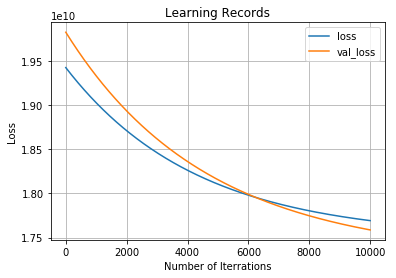

In [8]:
slr.plot_learning_record()

## [Task 3] Remove Terms of Biases

## [Task 4] Make Features Multi-dimentional

## [Task 5] Introduce an Equation for Updates

## [Task6] A Problem about Local Optimization

## [Task 7] What We Can Learn from Implementations from Scratch

    - We are not able to understand how algorithms of scikit-learn works without implementing those from scratch.
    
    - People who tried implementing scikit-learn from scratch are able to fulfill theirown responsibility for explaining why results they got are meaningful.
    
    - Also, We just can learn about high-quality programming. In this case, I definitely grasped structures of class.